In [2]:
import numpy as np
from astropy import units as u
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Units

In [3]:
#G_phy = 6.8e-8*u.cm*u.cm*u.cm/u.s/u.s/u.g
#G_iu = 1

#r_iu = 1 * u.au
#r_phy = r_iu.to(u.cm)

#M_iu = 1 * u.M_sun
#M_phy = M_iu.to(u.g)

#v_phy = np.sqrt(G_phy * M_phy / r_phy).to(u.km/u.s)
#t_phy = (r_phy / v_phy).to(u.yr)
#density_phy = (M_phy / (4/3 * np.pi * r_phy**3)).to(u.g/u.cm**3)
#a_phy = (G_phy * M_phy / r_phy**2).to(u.cm/u.s**2)

#E_phy = G_phy*(M_phy**2)/r_phy #cm^2 g s^-2 = erg

Values

In [4]:
# ---- 100 body with R = 1.5e15 cm , m = 2e33 g ----

#R_halo = 1e20
#m_points = 2e33
N_dim = 3

In [5]:
N = 4096
G_p = 6.67*10**(-8)*u.cm**3/(u.g*u.s**2)
G_iu = 1

# radius:
r_iu = 1*u.pc
r_p = r_iu.to(u.cm)

# mass:
M_iu = 1*u.M_sun
M_p = M_iu.to(u.g)

# my values:
m_points = 3*M_iu
R_halo = 90*r_iu

# the density of the cluster is given by:
rho_iu = N*(m_points/M_iu)/((4*np.pi*(R_halo/r_iu)**3)/3)
rho_p = N*M_p/((4*np.pi*(R_halo.to(u.cm))**3)/3)

# compute the collapse time:
cost = np.sqrt(3*np.pi/32)
tc_iu = cost/np.sqrt(G_iu*rho_iu)
tc_p = cost/np.sqrt(G_p*rho_p)

print("The mass of the stars - so my test particles - (in internal units) is: ", m_points/M_iu)
print("The radius of the cluster (in internal units) is: ", R_halo/r_iu)
print("The density of the cluster (in internal units) is: ", rho_iu)
print("The density of the cluster (in physical units) is: ", rho_p)
print("The collapse time (in internal units) is: ", tc_iu)
print("The collapse time (in physical units) is: ", tc_p)

The mass of the stars - so my test particles - (in internal units) is:  3.0
The radius of the cluster (in internal units) is:  90.0
The density of the cluster (in internal units) is:  0.004024065721632119
The density of the cluster (in physical units) is:  9.078165272843711e-26 g / cm3
The collapse time (in internal units) is:  8.555158144631836
The collapse time (in physical units) is:  6974267728371413.0 s


# Random generation through spherical symmetry

In [6]:
def random_points(radius):
    
    #theta = np.arccos(np.random.uniform(-1, 1))  
    #phi = np.random.uniform(0, 2*np.pi)     
    
    r = np.random.uniform(0, 1, N)**(1/3) * radius
    phi = np.random.uniform(0, 1, N) * (2*np.pi)
    theta = np.arccos(1 - 2*np.random.uniform(0, 1, N))
    
    #if we want bigger density towards the center
    
    #r = np.random.power(0.98) * radius
    #x = r * np.sin(theta) * np.cos(phi)
    #y = r * np.sin(theta) * np.sin(phi)
    #z = r * np.cos(theta)
    
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)

    return x, y, z

# output: coordinates as tuple
n_points = [random_points(R_halo) for _ in range(N)]
#print(n_points[0])

# output: coordinates as single vectors
#x_p = []
#y_p = []
#z_p = []

for _ in range(N):
    x, y, z = random_points(R_halo/u.pc)
    #x_p.append(x)
    #y_p.append(y)
    #z_p.append(z)


Plots

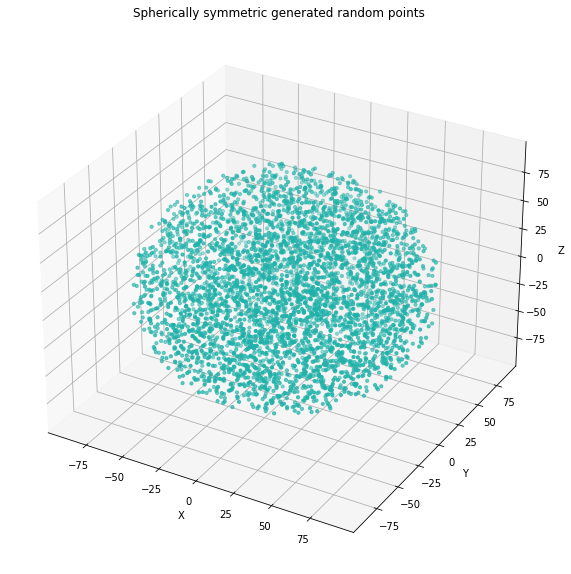

In [7]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
#ax.scatter(x_p, y_p, z_p, color='black', s=10)
ax.scatter(x, y, z, color='lightseagreen', s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Spherically symmetric generated random points')
plt.show()

In [8]:
vx = np.zeros(shape=N)
vy = np.zeros(shape=N)
vz = np.zeros(shape=N)
for i in range(N):
    vx[i] = 0
    vy[i] = 0
    vz[i] = 0

Writing on file

In [9]:
#def w_onfile(filename, num_points, radius, masses, dimension, x, y, z):
 #   with open(filename, 'w') as file:
  #      file.write(f'  {num_points} \n  {dimension} \n  {0}  \n')
   #     for i in range(num_points):
    #        file.write(f'  {(masses/M_iu).value}  \n')
     #   for i in range(num_points):
      #      file.write(f'  {(x[i]/r_iu).value}  {(y[i]/r_iu).value}  {(z[i]/r_iu).value}  \n')
       # for i in range(num_points):
            #file.write(f'  {(vx[i]/v_iu).value}  {(vy[i]/v_iu).value}  {(vz[i]/v_iu).value}  \n')
        #    file.write(f'  {0}  {0}  {0}  \n')
            
#filename = 'treecode_in.txt'

#w_onfile(filename, N, R_halo, m_points, N_dim, x, y, z)

In [10]:
def w_onfile(filename, num_points, radius, masses, dimension, x, y, z):
    with open(filename, 'w') as file:
        file.write(f'  {num_points} \n  {dimension} \n  {0}  \n')
        for _ in range(num_points):
            file.write(f'  {(masses/M_iu).value}  \n')
        for i in range(num_points):
            file.write(f'  {x[i]}  {y[i]}  {z[i]}  \n')
        for _ in range(num_points):
            #file.write(f'  {(vx[i]/v_iu).value}  {(vy[i]/v_iu).value}  {(vz[i]/v_iu).value}  \n')
            file.write(f'  {0}  {0}  {0}  \n')
            
filename = 'treecode_in.txt'

w_onfile(filename, N, R_halo, m_points, N_dim, x, y, z)